In [19]:
def DS_heatmaps(task):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib as plt
    %matplotlib inline
    df=pd.read_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/logReg/acc/DS/'+task+'_accTable_diff_sub.csv')
    df.set_index('Test_variables', inplace=True)
    ax=sns.heatmap(df, annot=True, vmin=.5, vmax=1)
    ax.set_title(task)
    fig=ax.get_figure()
    fig.savefig('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/images/logReg/acc/DS/' +task+ '_acc_heatmap.png', bbox_inches='tight')
    

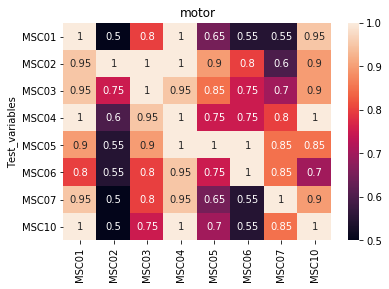

In [20]:
taskName=['mem','mixed','motor']
for t in taskName:
    DS_heatmaps(t)

In [21]:
def SS_heatmaps(subid):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib as plt
    %matplotlib inline
    df=pd.read_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/SS/' +subid+ '_accTable_same_sub.csv')
    df.set_index('Test_variables', inplace=True)
    ax=sns.heatmap(df, annot=True)
    fig=ax.get_figure()
    fig.savefig('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/images/SVC/acc/SS/' +subid+ '_acc_heatmap.png', bbox_inches='tight')
    

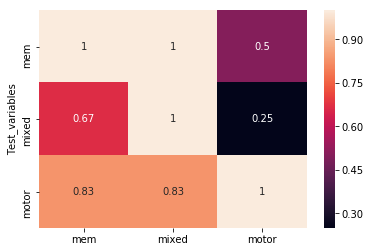

In [22]:
subs=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
for sub in subs:
    SS_heatmaps(sub)

In [23]:
def SS_concat():
    import pandas as pd
    import numpy as np
    import seaborn as sns
    #import matplotlib as plt
    import matplotlib.pyplot as plt
    %matplotlib inline
    #concatenate all dataframes
    accTable=[]
    subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
    taskList=['mem','mixed','motor']
    for i in subList:
        df=pd.read_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/logReg/acc/SS/'+i+'_accTable_same_sub.csv')
        df['sub']=i
        accTable.append(df)
    results=pd.concat(accTable)
    grouped_df=results.groupby('Test_variables')

    for j in taskList:
        task_df=grouped_df.get_group(j)
        task_df.set_index('sub', inplace=True)
        task_df.drop(columns=[j, 'Test_variables'], inplace=True)
        plt.figure() 
        ax=sns.heatmap(task_df, annot=True, vmin=0, vmax=1)
        ax.set_title('Testing ' + j)
        fig=ax.get_figure()
        fig.savefig('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/images/logReg/acc/SS/' +j+ '_acc_heatmap.png', bbox_inches='tight')


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


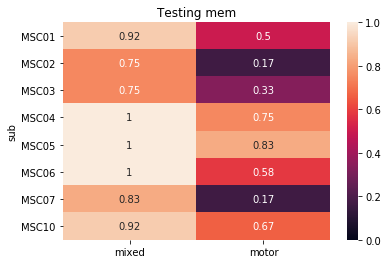

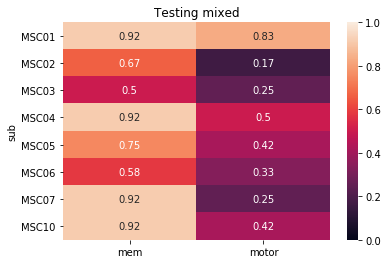

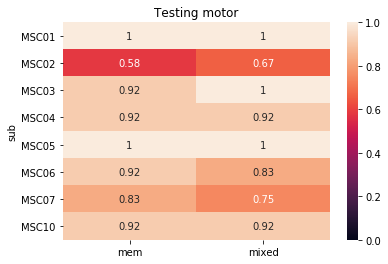

In [24]:
SS_concat()

In [25]:
def DS_boxplots(task):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib as plt
    %matplotlib inline
    df=pd.read_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/logReg/acc/DS/'+task+'_accTable_diff_sub.csv')
    df.drop(columns=['Test_variables'], inplace=True)
    meltdf=pd.melt(df, var_name='Training Variables', value_name='Accuracy')
    ax=sns.boxplot(x="Training Variables", y="Accuracy", data=meltdf)
    ax.set(ylim=(.4))
    ax.set_title(task)
    ax.axhline(.50, ls='--', color='r')
    fig=ax.get_figure()
    fig.savefig('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/images/logReg/acc/DS/' +task+ '_acc_boxplots.png', bbox_inches='tight')
    

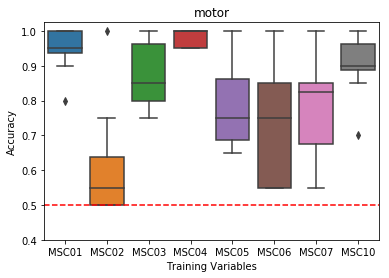

In [26]:
taskName=['mem','mixed','motor']
for t in taskName:
    DS_boxplots(t)

In [142]:
def CV_SS_concat():
    import pandas as pd
    import numpy as np
    import seaborn as sns
    #import matplotlib as plt
    import matplotlib.pyplot as plt
    %matplotlib inline
    #concatenate all dataframes
    accTable=[]
    subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
    taskList=['mem','mixed','motor']
    for i in subList:
        df=pd.read_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/logReg/acc/SS/'+i+'_cvTable_folds.csv')
        df.drop(columns='Unnamed: 0', inplace=True)
        m=df.mean()
        mean_df=pd.DataFrame(m)
        mean_df['sub']=i
        accTable.append(mean_df)
    results=pd.concat(accTable)
    results.rename(columns={results.columns[0]: "ACC" },inplace=True)
    results.index.name='Test_variables'
    grouped_df=results.groupby('Test_variables')
    for j in taskList:
        task_df=grouped_df.get_group(j)
        task_df.set_index('sub', inplace=True)
        plt.figure() 
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1)
        ax.set_title('Testing ' + j)
        fig=ax.get_figure()
        fig.savefig('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/images/logReg/acc/SS/' +j+ '_CV_heatmap.png', bbox_inches='tight')


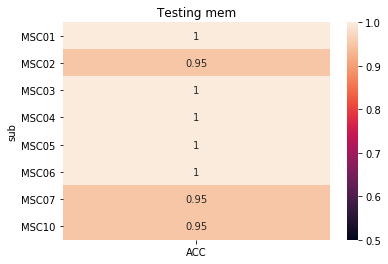

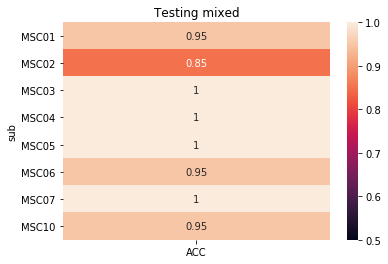

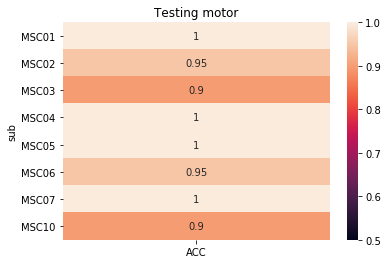

In [143]:
CV_SS_concat()

In [7]:
def BS_heatmaps(train_task, test_task):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib as plt
    %matplotlib inline
    df=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/logReg/acc/BS/'+train_task+ '_train_test_' +test_task+'.csv')
    df.set_index('Test_variables_'+test_task, inplace=True)
    ax=sns.heatmap(df, annot=True, vmin=.5, vmax=1)
    ax.set_title('Training ' +train_task+ ' testing '+test_task)
    fig=ax.get_figure()
    fig.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/logReg/acc/BS/' +train_task+ '_train_test_' +test_task+'_acc_heatmap.png', bbox_inches='tight')
    

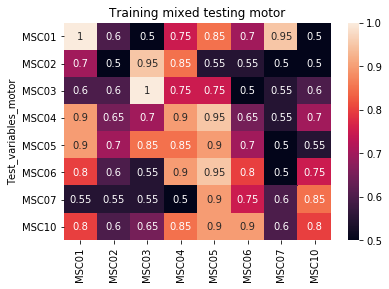

In [8]:
taskName=['mem', 'motor', 'mixed']
for train_task in taskName:
    for test_task in taskName:
        if train_task==test_task:
            continue
        else:
            BS_heatmaps(train_task, test_task)